# Introduction to Machine Learning
## Lesson 6 Support Vector Machines
## Introduction

In this lab work, we will familiarize ourselves with the classification algorithm using support vector machines.

## Task
It is often necessary to classify data in machine learning algorithms. Each data object is represented as a vector (a point) in p-dimensional space (a sequence of numbers). Each of these points belongs to only one of two classes. We are interested in whether we can divide the points by a hyperplane of dimension "p-1". This is a typical case of linear separability. There can be many such hyperplanes. Therefore, it is natural to believe that maximizing the gap between classes contributes to more confident classification. That is, can we find a hyperplane such that the distance from it to the nearest point is maximized. This would mean that the distance between the two closest points lying on opposite sides of the hyperplane is maximized. If such a hyperplane exists, we will be most interested in it, it is called the optimal separating hyperplane, and the linear classifier corresponding to it is called the optimal separating classifier.

### Performing the Classification
To do so you will need:
- Obtain data from competition
- Create a Jupyter notebook which will produce a file for submission
- Submit it to the competition

### Recap

1. What is SVM? Is it used for classification or regression?

2. What are Support Vectors?

3. What is a Hyperplane?

4. What is a Margin?

5. How does SVM work?


### Importing required Libraries

First we need to import necessary libraries:

[Pandas](https://pandas.pydata.org/) - For data analysis and manipulation

[Numpy](https://numpy.org/) - To deal with matrices

[Matplotlib](https://matplotlib.org/) - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

[Scipy](https://scipy.org/) - is an open-source software for mathematics, science, and engineering. It includes modules for statistics, optimization, integration, linear algebra, Fourier transforms, signal and image processing, ODE solvers, and more.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


We will first consider the simple case of a classification task, in which the two classes of points are **well** separated into two classes:

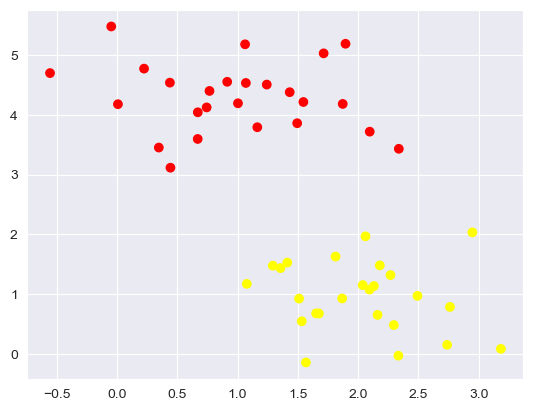

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

We will draw three lines that can separate these two classe. Depending on which line you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to consider the **margin**.

(-1.0, 3.5)

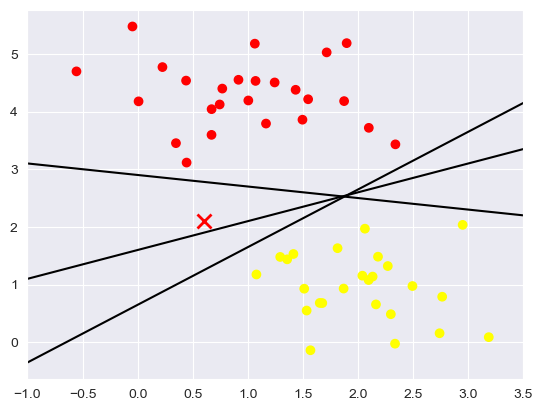

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

We will draw around each line a **margin** of some width, up to the nearest point. The line that maximizes this margin is the one we will choose as the optimal model.

(-1.0, 3.5)

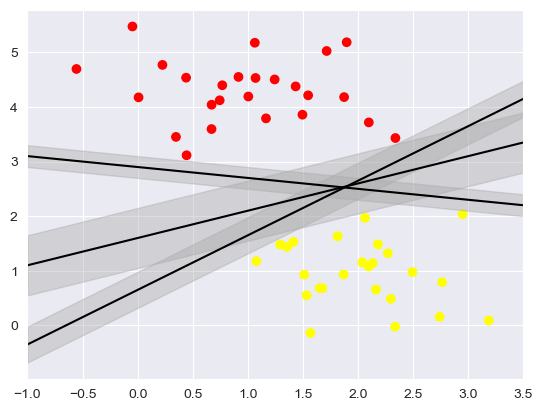

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)


### Support vector classifier

#### Exercise 1

Fit a simple SVC for classifing the previous data

use **SVC** and **fit()**

In [5]:
# Write your code here
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X, y)

SVC(kernel='linear')

 ##### plot the svc decision function

The relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

In order to obtain the fitted values for a given SVM model fit, we use the .desicion_function() method of the SVC

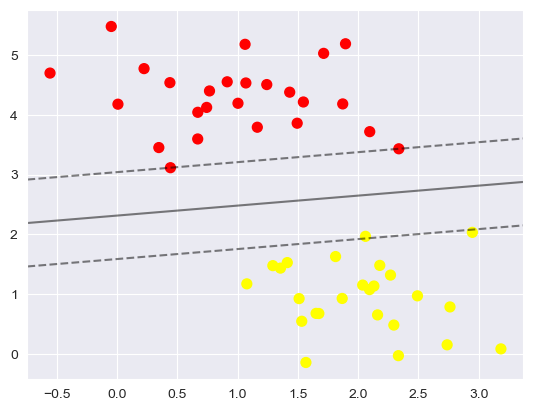

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

#### Exercise 2

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [7]:
# get support vectors
# get indices of support vectors
# get number of support vectors for each class
print("Support vectors :", model.support_vectors_)
print("Indices of the support vectors :", model.support_)
print("Number of the support vectors :", model.n_support_)

Support vectors : [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
Indices of the support vectors : [18 25  7]
Number of the support vectors : [2 1]


Let's see how the number of samples affect the svm model and it's margin

In [8]:
def plot_svm(N=10, ax=None, C=1E10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.90)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

### import additional library
[ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) - is a library for creating interactive widgets in Jupyter Notebooks and JupyterLab. It allows you to add interface elements such as sliders, drop-down lists, text boxes, and buttons to interact with Python code.

In [9]:
!pip3 install ipywidgets

In [15]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100, 200], C = [1E10, 1E5, 2, 4, 5], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100, 200), value=10), Dropdown(description='C', o…

#### Exercise 3

The  "c" argument allows us to specify the cost of a violation to the margin. When the "c" argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the "c" argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

How do use find the best "c" argument? n
<span style="color:blue"> Using cross validation

We will see how to use SVM for classifing images of hand-written digits.

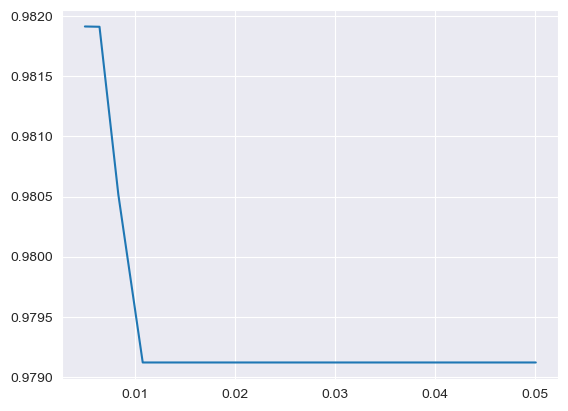

[0.9819129887727449, 0.981910569105691, 0.9805144212156408, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443, 0.9791206929926443]
0.005011872336272725


In [11]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits



X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =123)
Cs = np.logspace(-2.3, -1.3, 10)
cv_scores = []
# Use cross_val_score for finding the bect c from Cs
for c in Cs:
    model = SVC(kernel="linear", C=c)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(np.mean(score))

plt.plot(Cs, cv_scores)
plt.show()
print(cv_scores)
print(Cs[np.argmax(cv_scores)])

#### Exercise 4

Print classification_report, confusion_matrix for the a model with the best c argument

use **SVC**, **fit()**, **predict()**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
# fit SVM model with the best c argument
#Print classification_report, confusion_matrix for the  model

model = SVC(kernel="linear", C = Cs[np.argmax(cv_scores)])
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.87      1.00      0.93        34
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        42
           5       1.00      0.92      0.96        37
           6       1.00      0.98      0.99        43
           7       0.97      1.00      0.98        31
           8       1.00      0.89      0.94        37
           9       0.93      1.00      0.97        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  1  0  2]
 [ 0  1  0  0  0  0 42  0  0  0]
 [ 0  0  0

## Kernel SVM

1. What is called a kernel trick?

### Most popular kernel types

![image.png](./image.png)



### Generating data

<Figure size 2000x400 with 0 Axes>

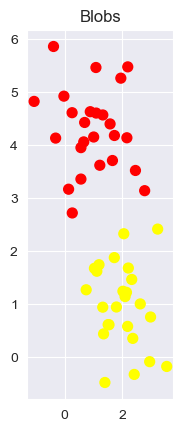

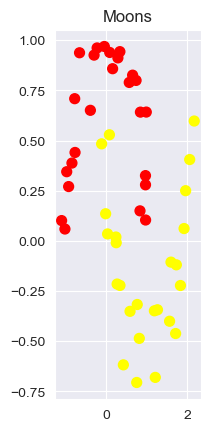

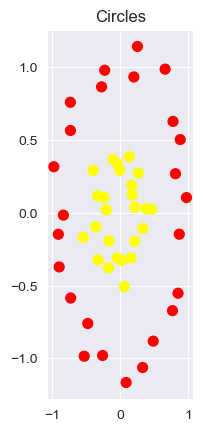

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# here we assign values for constants
n_samples = 50
C_const = 100

plt.figure(figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
plt.figure().add_subplot(131)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=50, cmap='autumn')
plt.title("Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
plt.figure().add_subplot(132)
plt.title("Moons")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, s=50, cmap='autumn')

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
plt.figure().add_subplot(133)
plt.title("Circles")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap='autumn')
plt.show()

In [21]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#### Exercise 5

For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.

In [24]:
# test kernels for each dataset
from sklearn.svm import SVC
def test_kernels(X, Y):
    plt.figure(figsize=(24, 5))

    linear_model = SVC(kernel="linear")
    linear_model.fit(X,Y)
    plt.figure().add_subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("Linear Kernel")
    plot_svc_decision_function(linear_model)

    gaussian_model = SVC(kernel="rbf")
    gaussian_model.fit(X,Y)
    plt.figure().add_subplot(132)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

    poly_model = SVC(kernel="poly")
    poly_model.fit(X,Y)
    plt.figure().add_subplot(133)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("Polynomial Kernel")
    plot_svc_decision_function(poly_model)

    plt.show()

<Figure size 2400x500 with 0 Axes>

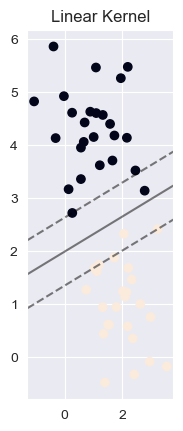

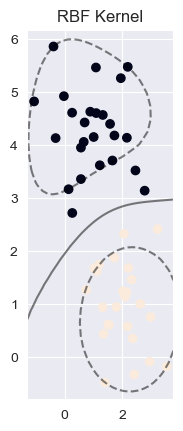

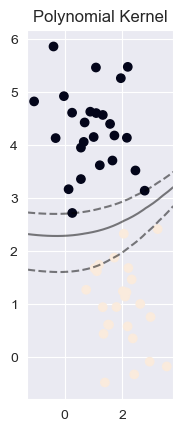

In [25]:
# test kernels for each dataset
# this is the approximate output you should get for the blobs dataset
test_kernels(X_blob, Y_blob)

<Figure size 2400x500 with 0 Axes>

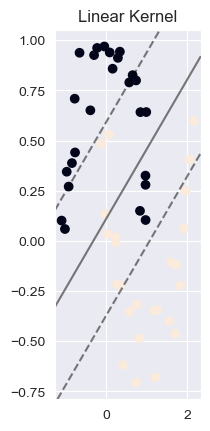

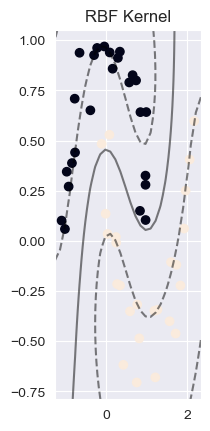

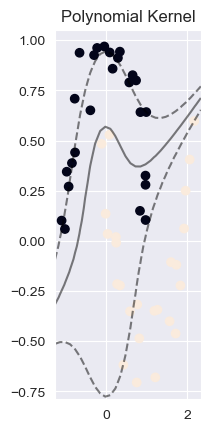

In [26]:
test_kernels(X_moon, Y_moon)

<Figure size 2400x500 with 0 Axes>

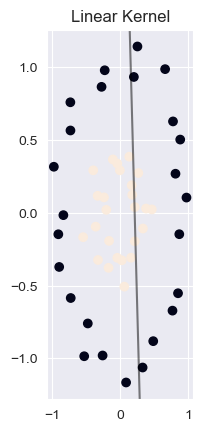

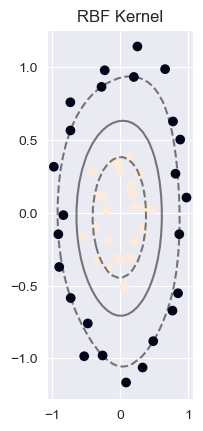

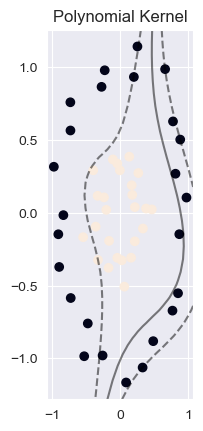

In [27]:
test_kernels(X_circle, Y_circle)

**gamma** - determines how close should the point be to hyperplane to have any impact on it. The lower the gamma, the more elements, even those that are far enough from the dividing line, take part in the process of choosing this very line. If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.

If you set the gamma level too high, then only the elements closest to the line will participate in the process of deciding on the position of the line. This will help ignore outliers in the data.


#### Exercise 6
In this assignment, you will investigate the effect of different parameters on the classification of the "moons" dataset using SVM (Support Vector Machine). You will use the ipywidgets library to create interactive widgets that allow you to change parameter values and see the results immediately.

use **SVC**, **fit()**, **Matplotlib**, **interact()**


In [28]:
# Manually tune parameters for the moons dataset, plotting the result
def test_gamma(gamma=1):
    gaussian_model = SVC(kernel="rbf", gamma=gamma)
    gaussian_model.fit(X_moon,Y_moon) 
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

def test_degree(degree=1):
    gaussian_model = SVC(kernel="poly", degree=degree)
    gaussian_model.fit(X_moon,Y_moon) 
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

In [31]:
interact(test_gamma, gamma=[0, 1, 2, 3, 1E3])

interactive(children=(Dropdown(description='gamma', index=1, options=(0, 1, 2, 3, 1000.0), value=1), Output())…

<function __main__.test_gamma(gamma=1)>

In [30]:
interact(test_degree, degree=[1, 2, 5, 3,11, 10, 14])

interactive(children=(Dropdown(description='degree', options=(1, 2, 5, 3, 11, 10, 14), value=1), Output()), _d…

<function __main__.test_degree(degree=1)>